In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
from nltk.corpus import stopwords
import seaborn as sns
%matplotlib inline

In [35]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [36]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Bag of words feature representation for descriptive text

In [37]:
#change words to lower case, as case does not provide information
#remove special characters and stopwords


vectorizer = CountVectorizer(stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b', max_df=0.9, strip_accents='ascii')

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 5901)

### fit Kmeans

In [ ]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans

clusterVal = 50


# print out plot for testing different numbers of clusters
distortions = []
for i in range(1, clusterVal):
    km = KMeans(n_clusters=i,n_init=30)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, clusterVal), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### labels are named with integers and stored in the `labels_` attribute

In [65]:
km.labels_

array([65, 25, 39, ...,  5,  6, 98], dtype=int32)

### take a look at one of the cluster results

In [66]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

sampleLen = 5
for x in range(0,clusterVal):
    count = 0
    sample = []
    
    for i in range(0,len(km.labels_)):
        if km.labels_[i] == x:
            count += 1
            if count < sampleLen:
                sample.append(raw_data['product_description'][i])
    
    print('**********')
    print('Cluster ' + str(x))
    print('Count ' + str(count))
    print('Sample of ' + str(sampleLen) + ' Descriptions\n')
    for i in range(0,len(sample)):
        print(sample[i] + '\n')
        
    

**********
Cluster 0
Count 72
Sample of 5 Descriptions

Spicy Chicken Marinade - Bake, item number 724444.01 Distributed by Kerry Ingredients & Flavours 3330 Millington Road, Beloit, WI 53511 Ingredients: salt, yeast extract, modified corn starch, dried chicken broth, onion powder, garlic powder, natural flavor, dried red pepper sauce (aged red peppers, vinegar, salt, garlic) maltodextrin, soybean oil, citric acid, paprika extract (color),  and less than 2% of calcium stearate to prevent caking.

Calico bean Salad  5  lbs Poly Tub (Item #01409) packaged under Costa and Stop & Shop brand,  Item T1407, C1407, 5 lb Poly Bag  Black eye peas , water, salt, calcium chloride  and disodium EDTA to preserve color), Chick Peas (cooked  dried chick peas, water,salt), Kidney Beans (kidney beans,  water. salt, CaCI2), Black Beans (black beans, water. salt,  CaCI2, ferrous gluconate), Italian Dressing (distilled vinegar,  soy bean oil, water, com syrup,salt. onion, red bell pepper,  xantham gum. spi

**********
Cluster 12
Count 48
Sample of 5 Descriptions

Cinderella Pumpkin Ice Cream Bucket , 371, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen.    Cinderella Pumpkin Ice Cream Half Gallon, Jeni's Splendid Ice Creams, LLC, half gallon, plastic container, individually packed, frozen.    Cinderella Pumpkin Ice Cream Pint Case, Jeni's Splendid Ice Creams, LLC, half gallon, plastic container, 4 half gallons per case, frozen.    Cinderella Pumpkin Ice Cream Pint Case, 271, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, 8 pints per case, frozen.

Cherry Lambic Ice Cream Bucket, 328, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen.    Cherry Lambic Ice Cream Pint Case, 228, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, 8 pints per case, frozen.    Cherry Lambic Ice Cream Pint, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, individually packed, frozen.  

Blue Ic

**********
Cluster 28
Count 36
Sample of 5 Descriptions

Bueno GC 1.5 Hot 5-5# Z, Product Item Number 1096-3. Packaged in sealed poly film pouches.  All packed in cardboard shipper box that is then sealed with attached shipper label. Total package size  5 units of 5 lbs each per case, totaling 25 lbs.

Bueno GC NM Mild 28oz Z, Product Item Number 1034-2. Packaged in plastic containers.   All packed in cardboard shipper box that is then sealed with attached shipper label. Total package size of  6 units of 28 oz each per case totaling 10.5 lbs.

Bueno GC NM Hot 12-13 oz Z, Product Item Number 1022-1.  Packaged in plastic containers.   All packed in cardboard shipper box that is then sealed with attached shipper label. Total package size of  12 units of 13 oz each per case totaling 9.75 lbs.

Bueno GC NM Hot 28oz, Product Item Number 1032-2. Packaged in plastic containers.   All packed in cardboard shipper box that is then sealed with attached shipper label. Total package size of  6 units

**********
Cluster 41
Count 3
Sample of 5 Descriptions

SOCKEYE SALMON:    1) "***SMOKED WILD SOCKEYE SALMON (NOVA LOX)***INGREDIENTS: Wild Sockeye Salmon, Salt, Sugar, Natural Wood Smoke. CONTAINS: SOCKEYE SALMON (FISH)***Produced By: SALMOLUX, 34100 9th Avenue S. Federal Way. WA 98003***".  2)  "***SOCKEYE SMOKED SALMON TRIM***NET WT: 2 lbs (908g)***INGREDIENTS: Wild Sockeye Salmon, Salt,  Sugar, Natural Wood Smoke. (No Preservatives or Artificial Colors)***Produced By: SALMOLUX, 34100 9th Avenue S. Federal Way. WA 98003***".  3) "***SMOKED SOCKEYE SALMON (NOVA LOX)***Net Wt. 4 oz (113g)***INGREDIENTS:  Alaskan Sockeye Salmon, Salt, Sugar, Natural Wood Smoke.  CONTAINS: FISH (SALMON)***0 16468 44900 8***".    

ATLANTIC SALMON:    1) "***Raley's***NOVA LOX***NET WT 4 OZ (113 g)***INGREDIENTS: ATLANTIC SALMON (FARM RAISED-COLOR ADDED), SALT, SUGAR, SODIUM NITRITE, NATURAL WOOD SMOKE. CONTAINS:  SALMON (FISH)***READY TO EAT***REFRIGERATED BELOW 38F***Proudly Distributed By: Raley's, 50

**********
Cluster 55
Count 5
Sample of 5 Descriptions

Caramel Apples with red cinnamon, topped with peanuts packaged in the following configurations with Best By Date range - 8/25-11/23/2014,  Responsible firm name on label is appy Apple Inc., Washington, MO, and Orosi, CA, :  Happy Apples, 1 Apple, Net Wt. 3.75 oz., Happy Apples, Value 3 Pack, Net Wt. 9 oz., Happy Apples, 4 Pack, Net Wt. 15 os., K roger Candy Apples, Net Wt. 3.75 oz. with Best By Date range - 9/15-11/18/2014, and Kroger Candy Apples 3 Pack, Net Wt. 10.5 oz. with Best By Date range - 9/15 -11/18/2014.

Caramel Apples with Peanuts, with Best By date range - 8/25-11/23/2014, Responsible firm name on label is Happy Apple Inc., Washington, MO., and Orosi, CA., packaged in the following configurations:    Happy Apples, Net Wt. 3.75 oz.,   Happy Apples 3 Pack, Net Wt. 9 oz.,   Happy Apples 4 Pack, Net Wt. 16 oz.,   Happy Apples 8 Pack, Net Wt. 24 oz., and     Kroger 3 Apples, Net Wt. 10.5 oz., with Best By date range - 9/1

**********
Cluster 69
Count 2
Sample of 5 Descriptions

UPC 1373312015,  Meijer Peanut Butter Dark Chocolate Protein Bars,Best By/Date Code:  DEC 05 16,  JAN 04 17.    UPC 3225108607, Family Gourmet Peanut Butter Dark Chocolate Protein ,Bars Best By/Date Code: JAN 04 17.    UPC 3680039453,	Food Club Peanut Butter Dark Chocolate Protein Bars,Best By/Date Code: DEC 05 16, JAN 04 17.    UPC 4130304540,	Essential Everyday Peanut Butter Dark Chocolate Protein Bars,  Best By/Date Code:	DEC 05 16, JAN 04 17.    UPC 5042847944 , Gold Emblem Peanut Butter Dark Chocolate Protein Bars ,Best By/Date Code:  DEC 05 16, JAN 04 17, JAN 05 17.    UPC 7003863811, Best Choice Peanut Butter Dark Chocolate Protein Bars,Best By/Date Code: DEC 05 16,  JAN 04 17.    UPC 7025322720, Our Family Peanut Butter Dark Chocolate Protein Bars,Best By/Date Code: DEC 05 16, JAN 04 17.    UPC 7078447478,  Tops Peanut Butter Dark Chocolate Protein Bars, Best By/Date Code: JAN 04 17.    UPC 7874203428,  Great Value Peanut 

**********
Cluster 80
Count 36
Sample of 5 Descriptions

American Potato Salads: 1) Garden-Fresh American Potato Salad, 1 lb., 0 11596 14015 5, 2 lb., 0 11596 24200 2; 2) Market Pantry American Potato Salad, l lb., 0 85293 24107 3, 3 lb.,  0 85239 24102 8; 3) Spartan American Potato Salad, 3 lb., 0 11213 90325 5      

Mustard Potato Salads: 1) Copperwood Premium Mustard Potato Salad, 2 lbs., 8 11839 01001 2, 5 lbs.; 2) Dairy Fresh Mustard Potato Salad, 0 070163 89090 9, 5 lbs.; 3) Garden Fresh Mustard Potato Salad, l lb., 0 11596 14010 0, 2 lb. 0 11596 24215 6; 4) Market Pantry Mustard Potato Salad, 16 oz., 0 85239 24104 2, 3 lb., 0 85239 24100 4; 5) Spartan Mustard Potato Salad, 1 lb., 0 11213 90319 4, 3 lb., 0 11213 90324; 6) Spoon River Mustard Potato Salad, 3 lb., 0 11596 24207 8; 7) Rogges Mustard American Potato Salad, 5 lb., 0 11596 51053 3           

Creamy Cole Slaw packaged under the following brand, salad name, container size, and UPC number:  1) Garden-Fresh Creamy Cole S

**********
Cluster 91
Count 18
Sample of 5 Descriptions

Buttermilk, Lemon & Blueberry Frozen Yogurt Bucket, 814, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen.  Buttermilk, Lemon & Blueberry Frozen Yogurt Pint Case, 714, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, 8 pints per case, frozen.  Buttermilk, Lemon & Blueberry Frozen Yogurt Pint, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, individually packed, frozen.

Bergamot Frozen Yogurt Bucket, 348, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen.  Bergamot Frozen Yogurt Pint Case, 248, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, 8 pints per case, frozen.  Bergamot Frozen Yogurt Pint, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, individually packed, frozen.

Mango Lassi Frozen Yogurt Bucket, 391, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen

In [62]:
range_n_clusters = [15]

For n_clusters = 15 The average silhouette_score is : 0.4289565643142458


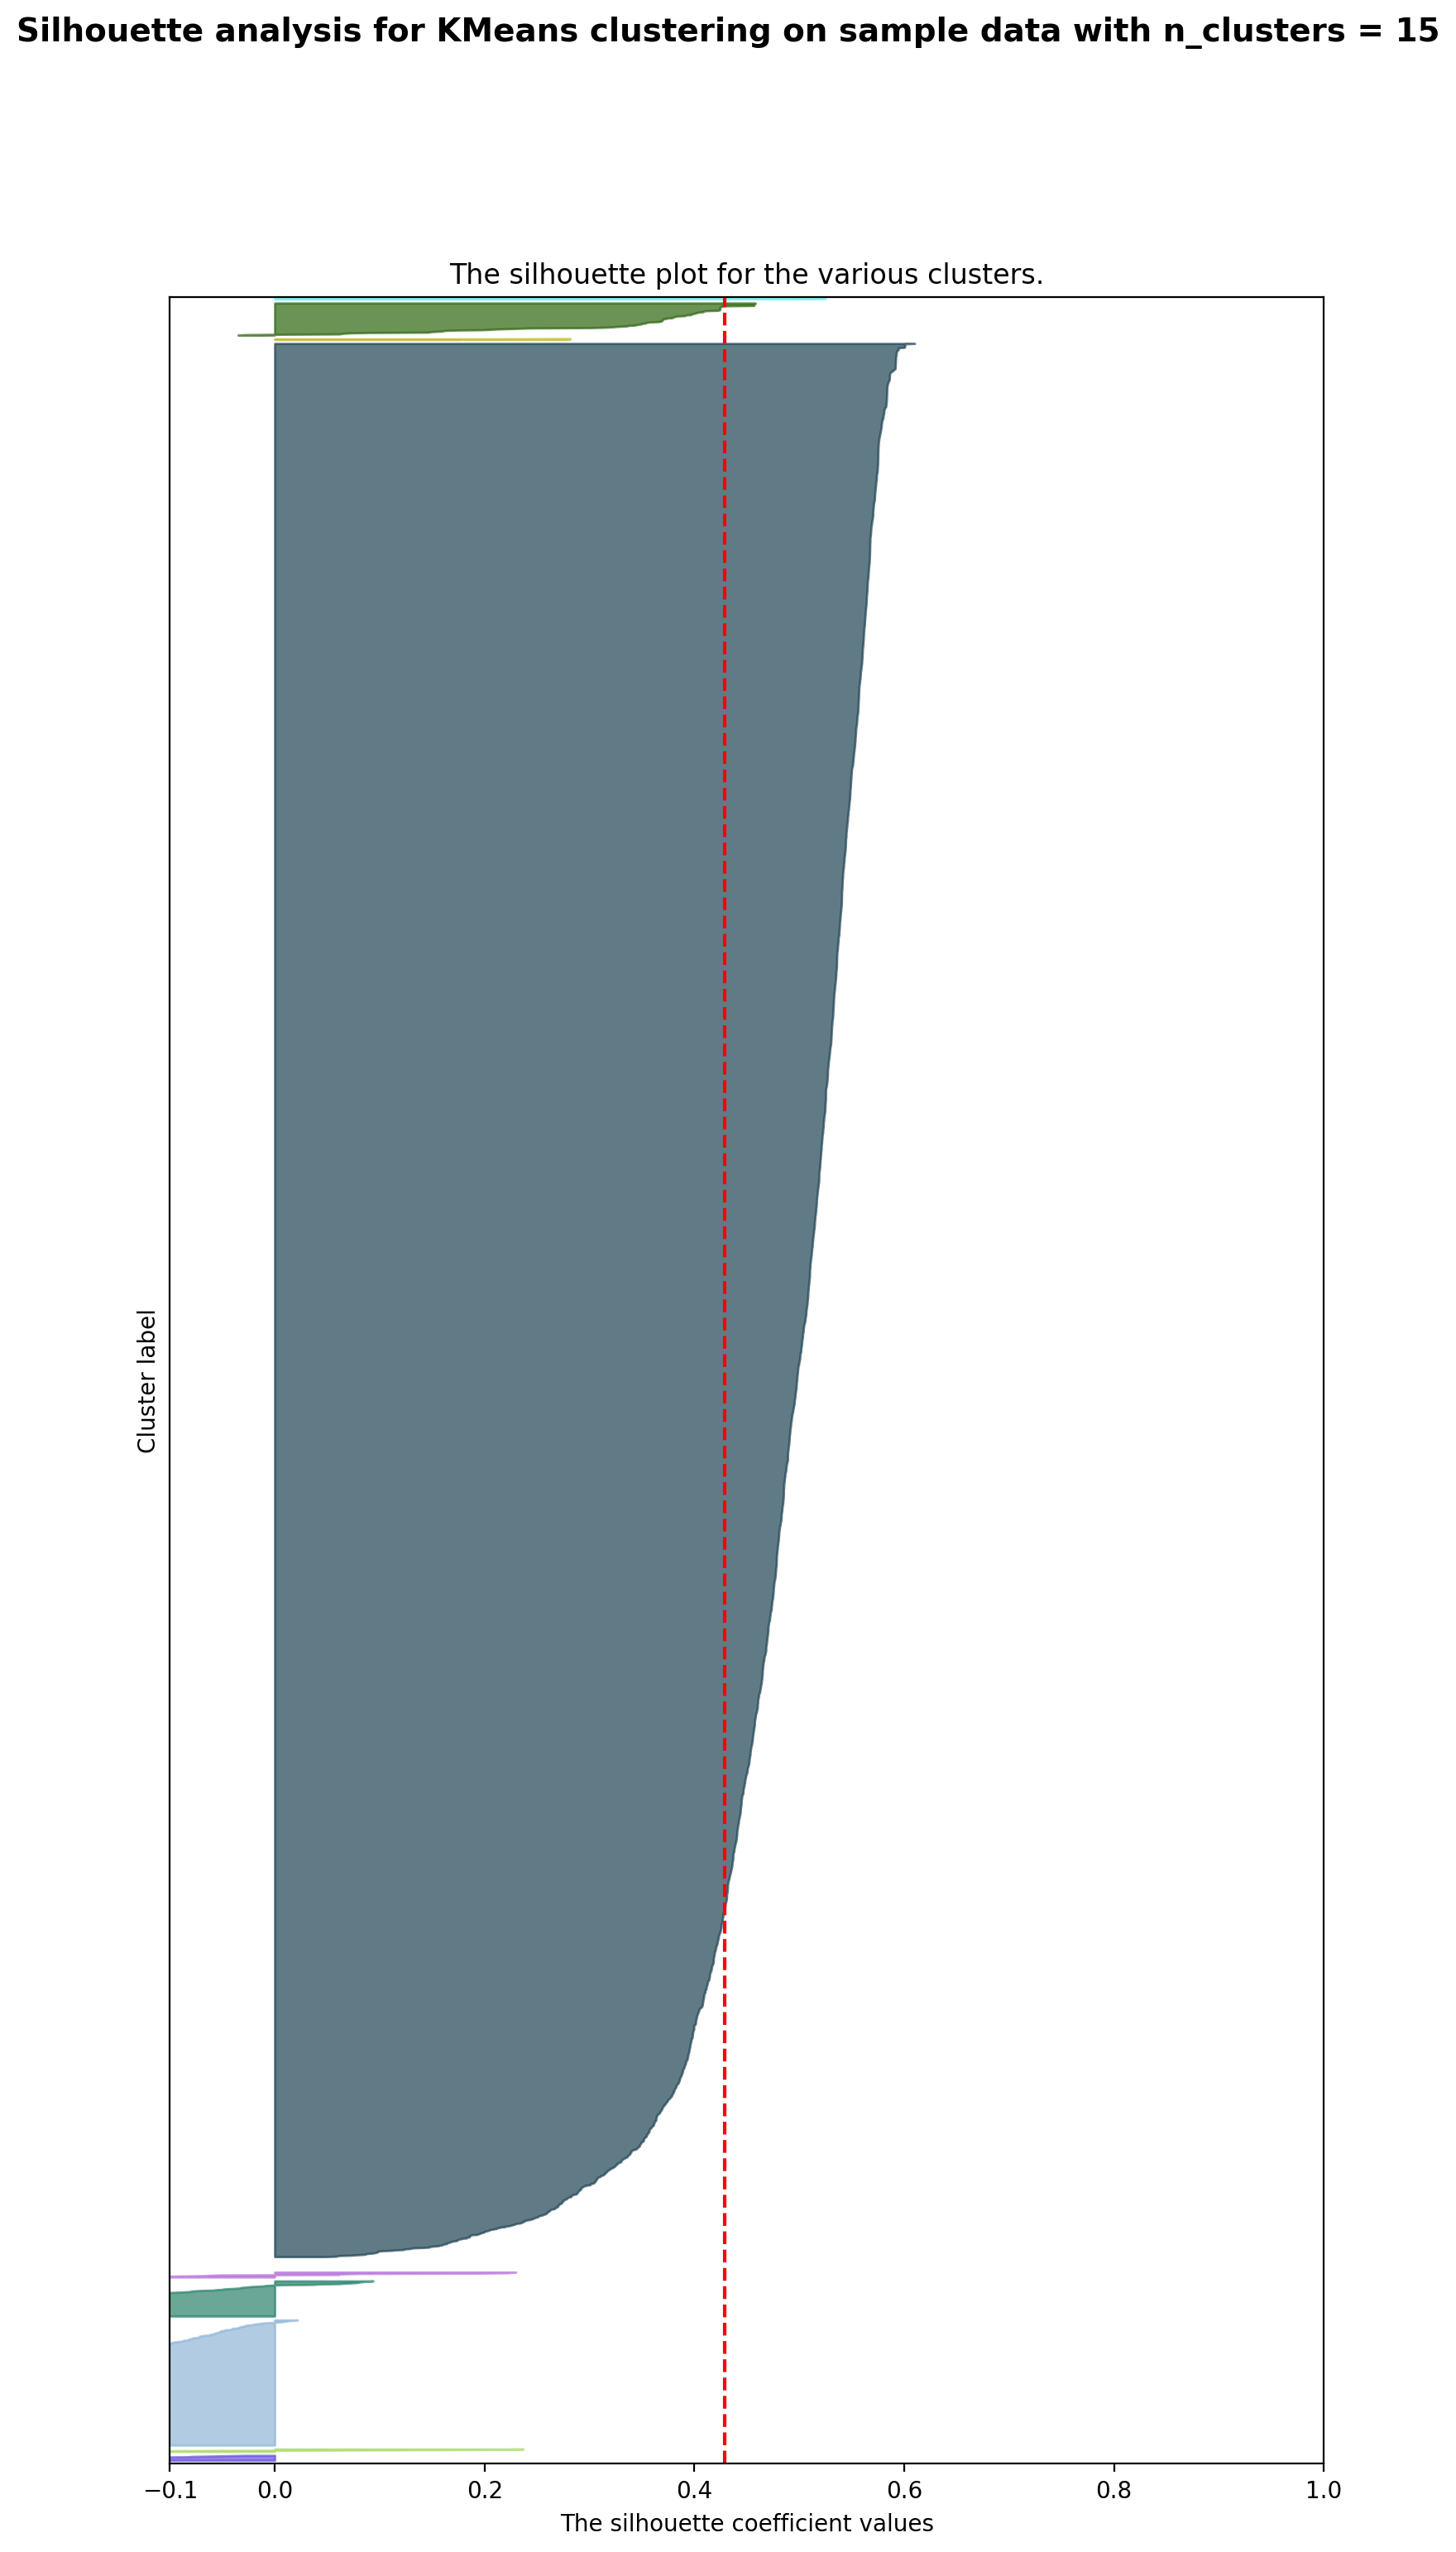

In [63]:
#modified from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random



for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)


    # The silhouette coefficient can range from -1, 1 but in this example all
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, 6000 + (n_clusters + 1) * 10])

    kmeans_kwargs = {
        "n_init": 20,
        "max_iter": 1000,
        "random_state": 54,
    }

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()